In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# import the local python package
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

import wild_bee_watch

In [3]:
# load images
img_bg = cv2.imread('../tests/data/background.jpg')
img_bee = cv2.imread('../tests/data/single_bee.jpg')

In [4]:
# get the config that corresponds to the loaded images
config_loader = wild_bee_watch.config_loader.ConfigLoader()
config = config_loader.load('../tests/data/config.yaml')

# instantiate the preprocessing 
preprocessing = wild_bee_watch.preprocessing.Preprocessing(config['preprocessing'])

# instantiate the detector
detector = wild_bee_watch.bee_detector.BeeDetector(config['bee_detector'], preprocessing)

In [6]:
# first, a reference image has to be passed in that does not contain any bees
detector.initialize(img_bg)

In [7]:
# now, the detector searches for bees and outputs bounding boxes
bboxes = detector.detect(img_bee)

In [13]:
# just a helper function ...
def draw_rect(rect, img):
    pt1 = (rect[0], rect[1])
    pt2 = (rect[0]+rect[2], rect[1]+rect[3])

    img = cv2.rectangle(img, pt1, pt2, (255, 0, 0), 2)

    return img

# manual call to preprocessing required here
img_color = np.copy(img_bee)
_, img_color = preprocessing.process(img_color)

for rect in bboxes:
    img_color = draw_rect(rect, img_color)

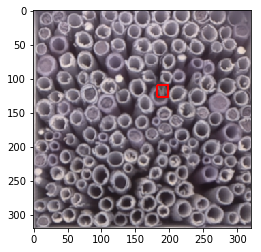

In [14]:
plt.imshow(img_color)
plt.show()